In [4]:
%matplotlib inline 
import matplotlib.pyplot as plt 
import numpy as np 
import pandas as pd 
from sklearn.cluster import KMeans
import seaborn as sns
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
from sklearn.cluster import DBSCAN
from sklearn import datasets

# PART 1
1. Join 3 tables using ID as key 
<br>
join 3 tables menggunakan full outer join.

In [5]:
datalosses = pd.read_csv('automobile-losses.csv')
print(datalosses)
datarisk=pd.read_csv('automobile-risk.csv')
print(datarisk)
dataspec=pd.read_csv('automobile-spec.csv')
print(dataspec)

      ID  normalized-losses
0      1                NaN
1      2                NaN
2      3                NaN
3      4              164.0
4      5              164.0
5      6                NaN
6      7              158.0
7      8                NaN
8      9              158.0
9     10                NaN
10    11              192.0
11    12              192.0
12    13              188.0
13    14              188.0
14    15                NaN
15    16                NaN
16    17                NaN
17    18                NaN
18    19              121.0
19    20               98.0
20    21               81.0
21    22              118.0
22    23              118.0
23    24              118.0
24    25              148.0
25    26              148.0
26    27              148.0
27    28              148.0
28    29              110.0
29    30              145.0
..   ...                ...
175  176               65.0
176  177               65.0
177  178               65.0
178  179            

In [6]:
data=pd.merge(datalosses, datarisk, how='outer', on='ID')
data

,ID,normalized-losses,symboling
0,1,NaN,3
1,2,NaN,3
2,3,NaN,1
3,4,164.0,2
4,5,164.0,2
5,6,NaN,2
6,7,158.0,1
7,8,NaN,1
8,9,158.0,1
9,10,NaN,0


In [8]:
datamerge=pd.merge(data, dataspec, how='outer', on='ID')
datamerge

,ID,normalized-losses,symboling,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheel,engine-loc,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,1,NaN,3,alfa-romero,gas,std,two,convertible,rwd,front,...,130,mpfi,3.47,2.68,9.00,111.0,5000.0,21,27,13495.0
1,2,NaN,3,alfa-romero,gas,std,two,convertible,rwd,front,...,130,mpfi,3.47,2.68,9.00,111.0,5000.0,21,27,16500.0
2,3,NaN,1,alfa-romero,gas,std,two,hatchback,rwd,front,...,152,mpfi,2.68,3.47,9.00,154.0,5000.0,19,26,16500.0
3,4,164.0,2,audi,gas,std,four,sedan,fwd,front,...,109,mpfi,3.19,3.40,10.00,102.0,5500.0,24,30,13950.0
4,5,164.0,2,audi,gas,std,four,sedan,4wd,front,...,136,mpfi,3.19,3.40,8.00,115.0,5500.0,18,22,17450.0
5,6,NaN,2,audi,gas,std,two,sedan,fwd,front,...,136,mpfi,3.19,3.40,8.50,110.0,5500.0,19,25,15250.0
6,7,158.0,1,audi,gas,std,four,sedan,fwd,front,...,136,mpfi,3.19,3.40,8.50,110.0,5500.0,19,25,17710.0
7,8,NaN,1,audi,gas,std,four,wagon,fwd,front,...,136,mpfi,3.19,3.40,8.50,110.0,5500.0,19,25,18920.0
8,9,158.0,1,audi,gas,turbo,four,sedan,fwd,front,...,131,mpfi,3.13,3.40,8.30,140.0,5500.0,17,20,23875.0
9,10,NaN,0,audi,gas,turbo,two,hatchback,4wd,front,...,131,mpfi,3.13,3.40,7.00,160.0,5500.0,16,22,NaN


#2. Quick-look (dimension, data type, head/tail, summary statistics, etc)
<br>
Data understanding, melihat info tentang data yang akan kita eksplor untuk mengetahui tipe data, dimensi, dan lain-lain

In [9]:
datamerge.shape

(205, 27)

In [10]:
print(type(datamerge))

<class 'pandas.core.frame.DataFrame'>


In [11]:
datamerge.head()

,ID,normalized-losses,symboling,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheel,engine-loc,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,1,NaN,3,alfa-romero,gas,std,two,convertible,rwd,front,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,2,NaN,3,alfa-romero,gas,std,two,convertible,rwd,front,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,3,NaN,1,alfa-romero,gas,std,two,hatchback,rwd,front,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,4,164.0,2,audi,gas,std,four,sedan,fwd,front,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,5,164.0,2,audi,gas,std,four,sedan,4wd,front,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


In [12]:
datamerge.tail()

,ID,normalized-losses,symboling,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheel,engine-loc,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
200,201,95.0,-1,volvo,gas,std,four,sedan,rwd,front,...,141,mpfi,3.78,3.15,9.5,114.0,5400.0,23,28,16845.0
201,202,95.0,-1,volvo,gas,turbo,four,sedan,rwd,front,...,141,mpfi,3.78,3.15,8.7,160.0,5300.0,19,25,19045.0
202,203,95.0,-1,volvo,gas,std,four,sedan,rwd,front,...,173,mpfi,3.58,2.87,8.8,134.0,5500.0,18,23,21485.0
203,204,95.0,-1,volvo,diesel,turbo,four,sedan,rwd,front,...,145,idi,3.01,3.40,23.0,106.0,4800.0,26,27,22470.0
204,205,95.0,-1,volvo,gas,turbo,four,sedan,rwd,front,...,141,mpfi,3.78,3.15,9.5,114.0,5400.0,19,25,22625.0


In [13]:
datamerge.describe()

,ID,normalized-losses,symboling,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,205.000000,164.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,201.000000,201.000000,205.000000,203.000000,203.000000,205.000000,205.000000,201.000000
mean,103.000000,122.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329751,3.255423,10.142537,104.256158,5125.369458,25.219512,30.751220,13207.129353
std,59.322565,35.442168,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.273539,0.316717,3.972040,39.714369,479.334560,6.542142,6.886443,7947.066342
min,1.000000,65.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,94.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000
50%,103.000000,115.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,150.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.590000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000
max,205.000000,256.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [14]:
print(datamerge.columns)

Index(['ID', 'normalized-losses', 'symboling', 'make', 'fuel-type',
       'aspiration', 'num-of-doors', 'body-style', 'drive-wheel', 'engine-loc',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'cylinder', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')


In [15]:
datamerge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 205 entries, 0 to 204
Data columns (total 27 columns):
ID                   205 non-null int64
normalized-losses    164 non-null float64
symboling            205 non-null int64
make                 205 non-null object
fuel-type            205 non-null object
aspiration           205 non-null object
num-of-doors         204 non-null object
body-style           205 non-null object
drive-wheel          205 non-null object
engine-loc           205 non-null object
wheel-base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb-weight          205 non-null int64
engine-type          205 non-null object
cylinder             205 non-null object
engine-size          205 non-null int64
fuel-system          205 non-null object
bore                 201 non-null float64
stroke               201 non-null float64
compression-ratio    205 non-nu

In [16]:
datamerge.dtypes

ID                     int64
normalized-losses    float64
symboling              int64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheel           object
engine-loc            object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
cylinder              object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
dtype: object

#3. Identify missing value. If any, how will you handle it?
<br>
Missing value detection, dan mengisi missing value numerik dengan median sedangkan untuk kategorik dengan modus

In [17]:
datamerge.isnull().sum()

ID                    0
normalized-losses    41
symboling             0
make                  0
fuel-type             0
aspiration            0
num-of-doors          1
body-style            0
drive-wheel           0
engine-loc            0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
cylinder              0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

In [18]:
datamerge=datamerge.drop_duplicates()
datamerge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 205 entries, 0 to 204
Data columns (total 27 columns):
ID                   205 non-null int64
normalized-losses    164 non-null float64
symboling            205 non-null int64
make                 205 non-null object
fuel-type            205 non-null object
aspiration           205 non-null object
num-of-doors         204 non-null object
body-style           205 non-null object
drive-wheel          205 non-null object
engine-loc           205 non-null object
wheel-base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb-weight          205 non-null int64
engine-type          205 non-null object
cylinder             205 non-null object
engine-size          205 non-null int64
fuel-system          205 non-null object
bore                 201 non-null float64
stroke               201 non-null float64
compression-ratio    205 non-nu

In [19]:
# Missing value numerik diganti dengan nilai median
median = datamerge['normalized-losses'].median()
datamerge['normalized-losses'].fillna(median, inplace=True)
datamerge

,ID,normalized-losses,symboling,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheel,engine-loc,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,1,115.0,3,alfa-romero,gas,std,two,convertible,rwd,front,...,130,mpfi,3.47,2.68,9.00,111.0,5000.0,21,27,13495.0
1,2,115.0,3,alfa-romero,gas,std,two,convertible,rwd,front,...,130,mpfi,3.47,2.68,9.00,111.0,5000.0,21,27,16500.0
2,3,115.0,1,alfa-romero,gas,std,two,hatchback,rwd,front,...,152,mpfi,2.68,3.47,9.00,154.0,5000.0,19,26,16500.0
3,4,164.0,2,audi,gas,std,four,sedan,fwd,front,...,109,mpfi,3.19,3.40,10.00,102.0,5500.0,24,30,13950.0
4,5,164.0,2,audi,gas,std,four,sedan,4wd,front,...,136,mpfi,3.19,3.40,8.00,115.0,5500.0,18,22,17450.0
5,6,115.0,2,audi,gas,std,two,sedan,fwd,front,...,136,mpfi,3.19,3.40,8.50,110.0,5500.0,19,25,15250.0
6,7,158.0,1,audi,gas,std,four,sedan,fwd,front,...,136,mpfi,3.19,3.40,8.50,110.0,5500.0,19,25,17710.0
7,8,115.0,1,audi,gas,std,four,wagon,fwd,front,...,136,mpfi,3.19,3.40,8.50,110.0,5500.0,19,25,18920.0
8,9,158.0,1,audi,gas,turbo,four,sedan,fwd,front,...,131,mpfi,3.13,3.40,8.30,140.0,5500.0,17,20,23875.0
9,10,115.0,0,audi,gas,turbo,two,hatchback,4wd,front,...,131,mpfi,3.13,3.40,7.00,160.0,5500.0,16,22,NaN


In [20]:
median = datamerge['horsepower'].median()
datamerge['horsepower'].fillna(median, inplace=True)
datamerge
median = datamerge['peak-rpm'].median()
datamerge['peak-rpm'].fillna(median, inplace=True)
datamerge
median = datamerge['price'].median()
datamerge['price'].fillna(median, inplace=True)
datamerge

,ID,normalized-losses,symboling,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheel,engine-loc,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,1,115.0,3,alfa-romero,gas,std,two,convertible,rwd,front,...,130,mpfi,3.47,2.68,9.00,111.0,5000.0,21,27,13495.0
1,2,115.0,3,alfa-romero,gas,std,two,convertible,rwd,front,...,130,mpfi,3.47,2.68,9.00,111.0,5000.0,21,27,16500.0
2,3,115.0,1,alfa-romero,gas,std,two,hatchback,rwd,front,...,152,mpfi,2.68,3.47,9.00,154.0,5000.0,19,26,16500.0
3,4,164.0,2,audi,gas,std,four,sedan,fwd,front,...,109,mpfi,3.19,3.40,10.00,102.0,5500.0,24,30,13950.0
4,5,164.0,2,audi,gas,std,four,sedan,4wd,front,...,136,mpfi,3.19,3.40,8.00,115.0,5500.0,18,22,17450.0
5,6,115.0,2,audi,gas,std,two,sedan,fwd,front,...,136,mpfi,3.19,3.40,8.50,110.0,5500.0,19,25,15250.0
6,7,158.0,1,audi,gas,std,four,sedan,fwd,front,...,136,mpfi,3.19,3.40,8.50,110.0,5500.0,19,25,17710.0
7,8,115.0,1,audi,gas,std,four,wagon,fwd,front,...,136,mpfi,3.19,3.40,8.50,110.0,5500.0,19,25,18920.0
8,9,158.0,1,audi,gas,turbo,four,sedan,fwd,front,...,131,mpfi,3.13,3.40,8.30,140.0,5500.0,17,20,23875.0
9,10,115.0,0,audi,gas,turbo,two,hatchback,4wd,front,...,131,mpfi,3.13,3.40,7.00,160.0,5500.0,16,22,10295.0


In [21]:
median = datamerge['bore'].median()
datamerge['bore'].fillna(median, inplace=True)
datamerge
median = datamerge['stroke'].median()
datamerge['stroke'].fillna(median, inplace=True)
datamerge

,ID,normalized-losses,symboling,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheel,engine-loc,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,1,115.0,3,alfa-romero,gas,std,two,convertible,rwd,front,...,130,mpfi,3.47,2.68,9.00,111.0,5000.0,21,27,13495.0
1,2,115.0,3,alfa-romero,gas,std,two,convertible,rwd,front,...,130,mpfi,3.47,2.68,9.00,111.0,5000.0,21,27,16500.0
2,3,115.0,1,alfa-romero,gas,std,two,hatchback,rwd,front,...,152,mpfi,2.68,3.47,9.00,154.0,5000.0,19,26,16500.0
3,4,164.0,2,audi,gas,std,four,sedan,fwd,front,...,109,mpfi,3.19,3.40,10.00,102.0,5500.0,24,30,13950.0
4,5,164.0,2,audi,gas,std,four,sedan,4wd,front,...,136,mpfi,3.19,3.40,8.00,115.0,5500.0,18,22,17450.0
5,6,115.0,2,audi,gas,std,two,sedan,fwd,front,...,136,mpfi,3.19,3.40,8.50,110.0,5500.0,19,25,15250.0
6,7,158.0,1,audi,gas,std,four,sedan,fwd,front,...,136,mpfi,3.19,3.40,8.50,110.0,5500.0,19,25,17710.0
7,8,115.0,1,audi,gas,std,four,wagon,fwd,front,...,136,mpfi,3.19,3.40,8.50,110.0,5500.0,19,25,18920.0
8,9,158.0,1,audi,gas,turbo,four,sedan,fwd,front,...,131,mpfi,3.13,3.40,8.30,140.0,5500.0,17,20,23875.0
9,10,115.0,0,audi,gas,turbo,two,hatchback,4wd,front,...,131,mpfi,3.13,3.40,7.00,160.0,5500.0,16,22,10295.0


In [22]:
# Missing value kategorik diganti dengan nilai modus
datamerge['num-of-doors']=datamerge['num-of-doors'].fillna(datamerge['num-of-doors'].mode().values[0])
datamerge

,ID,normalized-losses,symboling,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheel,engine-loc,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,1,115.0,3,alfa-romero,gas,std,two,convertible,rwd,front,...,130,mpfi,3.47,2.68,9.00,111.0,5000.0,21,27,13495.0
1,2,115.0,3,alfa-romero,gas,std,two,convertible,rwd,front,...,130,mpfi,3.47,2.68,9.00,111.0,5000.0,21,27,16500.0
2,3,115.0,1,alfa-romero,gas,std,two,hatchback,rwd,front,...,152,mpfi,2.68,3.47,9.00,154.0,5000.0,19,26,16500.0
3,4,164.0,2,audi,gas,std,four,sedan,fwd,front,...,109,mpfi,3.19,3.40,10.00,102.0,5500.0,24,30,13950.0
4,5,164.0,2,audi,gas,std,four,sedan,4wd,front,...,136,mpfi,3.19,3.40,8.00,115.0,5500.0,18,22,17450.0
5,6,115.0,2,audi,gas,std,two,sedan,fwd,front,...,136,mpfi,3.19,3.40,8.50,110.0,5500.0,19,25,15250.0
6,7,158.0,1,audi,gas,std,four,sedan,fwd,front,...,136,mpfi,3.19,3.40,8.50,110.0,5500.0,19,25,17710.0
7,8,115.0,1,audi,gas,std,four,wagon,fwd,front,...,136,mpfi,3.19,3.40,8.50,110.0,5500.0,19,25,18920.0
8,9,158.0,1,audi,gas,turbo,four,sedan,fwd,front,...,131,mpfi,3.13,3.40,8.30,140.0,5500.0,17,20,23875.0
9,10,115.0,0,audi,gas,turbo,two,hatchback,4wd,front,...,131,mpfi,3.13,3.40,7.00,160.0,5500.0,16,22,10295.0


In [23]:
datamerge.isnull().sum()

ID                   0
normalized-losses    0
symboling            0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheel          0
engine-loc           0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
cylinder             0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [24]:
datamerge

,ID,normalized-losses,symboling,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheel,engine-loc,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,1,115.0,3,alfa-romero,gas,std,two,convertible,rwd,front,...,130,mpfi,3.47,2.68,9.00,111.0,5000.0,21,27,13495.0
1,2,115.0,3,alfa-romero,gas,std,two,convertible,rwd,front,...,130,mpfi,3.47,2.68,9.00,111.0,5000.0,21,27,16500.0
2,3,115.0,1,alfa-romero,gas,std,two,hatchback,rwd,front,...,152,mpfi,2.68,3.47,9.00,154.0,5000.0,19,26,16500.0
3,4,164.0,2,audi,gas,std,four,sedan,fwd,front,...,109,mpfi,3.19,3.40,10.00,102.0,5500.0,24,30,13950.0
4,5,164.0,2,audi,gas,std,four,sedan,4wd,front,...,136,mpfi,3.19,3.40,8.00,115.0,5500.0,18,22,17450.0
5,6,115.0,2,audi,gas,std,two,sedan,fwd,front,...,136,mpfi,3.19,3.40,8.50,110.0,5500.0,19,25,15250.0
6,7,158.0,1,audi,gas,std,four,sedan,fwd,front,...,136,mpfi,3.19,3.40,8.50,110.0,5500.0,19,25,17710.0
7,8,115.0,1,audi,gas,std,four,wagon,fwd,front,...,136,mpfi,3.19,3.40,8.50,110.0,5500.0,19,25,18920.0
8,9,158.0,1,audi,gas,turbo,four,sedan,fwd,front,...,131,mpfi,3.13,3.40,8.30,140.0,5500.0,17,20,23875.0
9,10,115.0,0,audi,gas,turbo,two,hatchback,4wd,front,...,131,mpfi,3.13,3.40,7.00,160.0,5500.0,16,22,10295.0


#4. Perform visualization using at least 5 difference visualization technique(barplot, scatterplot, area, boxplot, pie chart, line chart, etc)

# BOX PLOT : Comparation and Distribution between Bore and Stroke

In [22]:
box = datamerge[['bore', 'stroke']]
box.head()

,bore,stroke
0,3.47,2.68
1,3.47,2.68
2,2.68,3.47
3,3.19,3.40
4,3.19,3.40


In [23]:
box.describe()

,bore,stroke
count,205.000000,205.000000
mean,3.329366,3.256098
std,0.270858,0.313634
min,2.540000,2.070000
25%,3.150000,3.110000
50%,3.310000,3.290000
75%,3.580000,3.410000
max,3.940000,4.170000


In [24]:
box_array = np.array(box)
box_array

array([[3.47, 2.68],
       [3.47, 2.68],
       [2.68, 3.47],
       [3.19, 3.4 ],
       [3.19, 3.4 ],
       [3.19, 3.4 ],
       [3.19, 3.4 ],
       [3.19, 3.4 ],
       [3.13, 3.4 ],
       [3.13, 3.4 ],
       [3.5 , 2.8 ],
       [3.5 , 2.8 ],
       [3.31, 3.19],
       [3.31, 3.19],
       [3.31, 3.19],
       [3.62, 3.39],
       [3.62, 3.39],
       [3.62, 3.39],
       [2.91, 3.03],
       [3.03, 3.11],
       [3.03, 3.11],
       [2.97, 3.23],
       [2.97, 3.23],
       [3.03, 3.39],
       [2.97, 3.23],
       [2.97, 3.23],
       [2.97, 3.23],
       [3.03, 3.39],
       [3.34, 3.46],
       [3.6 , 3.9 ],
       [2.91, 3.41],
       [2.91, 3.41],
       [2.91, 3.07],
       [2.91, 3.41],
       [2.91, 3.41],
       [2.91, 3.41],
       [2.92, 3.41],
       [3.15, 3.58],
       [3.15, 3.58],
       [3.15, 3.58],
       [3.15, 3.58],
       [3.15, 3.58],
       [3.15, 3.58],
       [3.31, 3.23],
       [3.03, 3.11],
       [3.03, 3.11],
       [3.43, 3.23],
       [3.63,

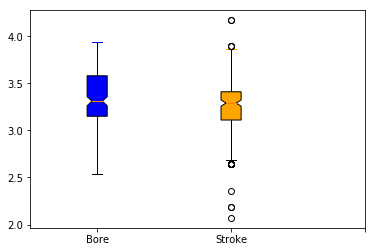

In [48]:
colors = ['blue', 'orange', 'purple']

bp = plt.boxplot(box_array,
                 patch_artist=True,
                 notch=True)

for i in range(len(bp['boxes'])):
    
    bp['boxes'][i].set(facecolor=colors[i])
    
    bp['caps'][2*i + 1].set(color=colors[i])
    
plt.xticks([1, 2, 3], ['Bore', 'Stroke'])

plt.show()

# VIOLIN PLOT : Knowing density of the data points around a particular value with their widths between Bore and Stroke

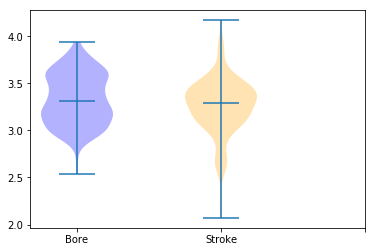

In [26]:
vp = plt.violinplot(box_array,
                    showmedians=True)

plt.xticks([1, 2, 3], ['Bore', 'Stroke'])

for i in range(len(vp['bodies'])):
    vp['bodies'][i].set(facecolor=colors[i])

plt.show()   

# BAR PLOT : Comparing Price between 7 highest Brands (Make)

In [17]:
numofdoors_four=datamerge[datamerge['num-of-doors']=='four']
numofdoors_four.head()

,ID,normalized-losses,symboling,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheel,engine-loc,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
3,4,164.0,2,audi,gas,std,four,sedan,fwd,front,...,109,mpfi,3.19,3.4,10.0,102.0,5500.0,24,30,13950.0
4,5,164.0,2,audi,gas,std,four,sedan,4wd,front,...,136,mpfi,3.19,3.4,8.0,115.0,5500.0,18,22,17450.0
6,7,158.0,1,audi,gas,std,four,sedan,fwd,front,...,136,mpfi,3.19,3.4,8.5,110.0,5500.0,19,25,17710.0
7,8,115.0,1,audi,gas,std,four,wagon,fwd,front,...,136,mpfi,3.19,3.4,8.5,110.0,5500.0,19,25,18920.0
8,9,158.0,1,audi,gas,turbo,four,sedan,fwd,front,...,131,mpfi,3.13,3.4,8.3,140.0,5500.0,17,20,23875.0


In [18]:
brand=numofdoors_four[['make', 'price']].groupby('make').sum()
brand2=pd.DataFrame(brand)
brand2.index

Index(['audi', 'bmw', 'chevrolet', 'dodge', 'honda', 'isuzu', 'jaguar',
       'mazda', 'mercedes-benz', 'mitsubishi', 'nissan', 'peugot', 'plymouth',
       'renault', 'saab', 'subaru', 'toyota', 'volkswagen', 'volvo'],
      dtype='object', name='make')

In [19]:
top7price=brand2.sort_values('price',ascending=False).head(7)
top7price

,price
make,
volvo,198695.0
peugot,170380.0
toyota,168478.0
mercedes-benz,160544.0
bmw,130235.0
audi,91905.0
nissan,89591.0


45400.0


([<matplotlib.axis.XTick at 0x257b30d67b8>,
 <a list of 7 Text xticklabel objects>)

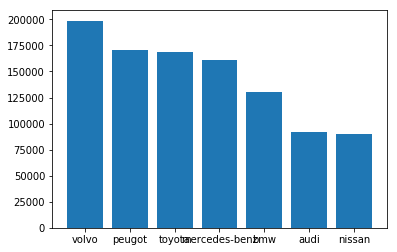

In [30]:
print(max(datamerge.price))
x=range(7)
plt.bar(x,top5price['price'])
plt.xticks(x,top5price.index)

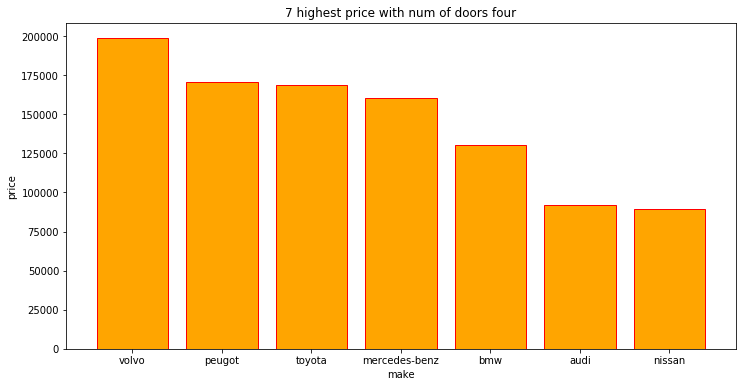

In [20]:
plt.figure(figsize=(12,6))

x=range(7)
plt.bar(x,top7price['price'],facecolor='orange',edgecolor='red')
plt.xticks(x,top7price.index)
plt.xlabel('make')
plt.ylabel('price')
plt.title('7 highest price with num of doors four')
plt.show()

# HISTOGRAM : Distribution of Normalized-losses data

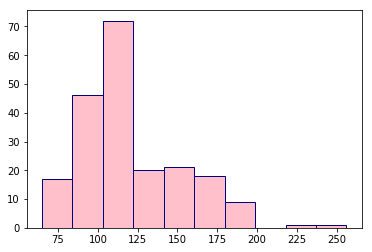

In [32]:
plt.hist(datamerge['normalized-losses'], 
         facecolor='pink', 
         edgecolor='navy', 
         bins=10)
plt.show() #harus plt.show() biar keluar grafik nya

# PIE CHART : Composition Body-Style data

In [33]:
count=datamerge['body-style'].value_counts()
count

sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: body-style, dtype: int64

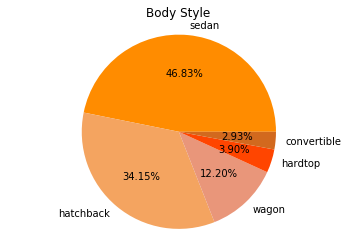

In [34]:
colors = ['darkorange', 'sandybrown', 'darksalmon', 'orangered','chocolate']
labels=['sedan', 'hatchback', 'wagon', 'hardtop', 'convertible']
plt.title('Body Style')
plt.pie(count,labels=labels, 
        colors=colors, 
        autopct='%1.2f%%')

plt.axis('equal')

plt.show()

## PART 2

#1. CAR BRAND WITH HIGHEST PRICE

In [35]:
datamerge[['make','price']].sort_values(by=['price'], ascending=False).head(1)

,make,price
74,mercedes-benz,45400.0


#2. Maximum horsepower for car with 6 cylinder engine

In [36]:
cylinder=datamerge[datamerge['cylinder']=='six']
cylinder

,ID,normalized-losses,symboling,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheel,engine-loc,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
2,3,115.0,1,alfa-romero,gas,std,two,hatchback,rwd,front,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
12,13,188.0,0,bmw,gas,std,two,sedan,rwd,front,...,164,mpfi,3.31,3.19,9.0,121.0,4250.0,21,28,20970.0
13,14,188.0,0,bmw,gas,std,four,sedan,rwd,front,...,164,mpfi,3.31,3.19,9.0,121.0,4250.0,21,28,21105.0
14,15,115.0,1,bmw,gas,std,four,sedan,rwd,front,...,164,mpfi,3.31,3.19,9.0,121.0,4250.0,20,25,24565.0
15,16,115.0,0,bmw,gas,std,four,sedan,rwd,front,...,209,mpfi,3.62,3.39,8.0,182.0,5400.0,16,22,30760.0
16,17,115.0,0,bmw,gas,std,two,sedan,rwd,front,...,209,mpfi,3.62,3.39,8.0,182.0,5400.0,16,22,41315.0
17,18,115.0,0,bmw,gas,std,four,sedan,rwd,front,...,209,mpfi,3.62,3.39,8.0,182.0,5400.0,15,20,36880.0
47,48,145.0,0,jaguar,gas,std,four,sedan,rwd,front,...,258,mpfi,3.63,4.17,8.1,176.0,4750.0,15,19,32250.0
48,49,115.0,0,jaguar,gas,std,four,sedan,rwd,front,...,258,mpfi,3.63,4.17,8.1,176.0,4750.0,15,19,35550.0
101,102,128.0,0,nissan,gas,std,four,sedan,fwd,front,...,181,mpfi,3.43,3.27,9.0,152.0,5200.0,17,22,13499.0


In [37]:
cylinder[['make','horsepower']].sort_values(by=['horsepower'], ascending=False).head(1)

,make,horsepower
126,porsche,207.0


#3. Average peak-rpm for ‘turbo’ style aspiration car

In [38]:
datamerge[datamerge.aspiration == 'turbo'][["peak-rpm"]].mean()

peak-rpm    4939.189189
dtype: float64

#4. Average price based on body-style

In [39]:
pd.DataFrame(datamerge.groupby(['body-style']).mean().price)

,price
body-style,
convertible,21890.500000
hardtop,22208.500000
hatchback,9967.085714
sedan,14372.989583
wagon,12371.960000


#5. Average price based on body-style only for Honda car (make=Honda)

In [40]:
honda=datamerge[datamerge['make']=='honda']
honda

,ID,normalized-losses,symboling,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheel,engine-loc,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
30,31,137.0,2,honda,gas,std,two,hatchback,fwd,front,...,92,1bbl,2.91,3.41,9.6,58.0,4800.0,49,54,6479.0
31,32,137.0,2,honda,gas,std,two,hatchback,fwd,front,...,92,1bbl,2.91,3.41,9.2,76.0,6000.0,31,38,6855.0
32,33,101.0,1,honda,gas,std,two,hatchback,fwd,front,...,79,1bbl,2.91,3.07,10.1,60.0,5500.0,38,42,5399.0
33,34,101.0,1,honda,gas,std,two,hatchback,fwd,front,...,92,1bbl,2.91,3.41,9.2,76.0,6000.0,30,34,6529.0
34,35,101.0,1,honda,gas,std,two,hatchback,fwd,front,...,92,1bbl,2.91,3.41,9.2,76.0,6000.0,30,34,7129.0
35,36,110.0,0,honda,gas,std,four,sedan,fwd,front,...,92,1bbl,2.91,3.41,9.2,76.0,6000.0,30,34,7295.0
36,37,78.0,0,honda,gas,std,four,wagon,fwd,front,...,92,1bbl,2.92,3.41,9.2,76.0,6000.0,30,34,7295.0
37,38,106.0,0,honda,gas,std,two,hatchback,fwd,front,...,110,1bbl,3.15,3.58,9.0,86.0,5800.0,27,33,7895.0
38,39,106.0,0,honda,gas,std,two,hatchback,fwd,front,...,110,1bbl,3.15,3.58,9.0,86.0,5800.0,27,33,9095.0
39,40,85.0,0,honda,gas,std,four,sedan,fwd,front,...,110,1bbl,3.15,3.58,9.0,86.0,5800.0,27,33,8845.0


In [41]:
pd.DataFrame(honda.groupby(['body-style']).mean().price)

,price
body-style,
hatchback,7054.428571
sedan,9945.000000
wagon,7295.000000


# CLUSTERING MODEL
Clustering is a method to find sub groups that have the same characteristics in a population. <br>
Clustering is nothing but dividing a set of data into groups of similar points or features, where data points in the same group are as similar as possible and data points in different groups are as dissimilar as possible.

First, we need to quick-look the data

In [25]:
datamerge.head()

,ID,normalized-losses,symboling,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheel,engine-loc,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,1,115.0,3,alfa-romero,gas,std,two,convertible,rwd,front,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,2,115.0,3,alfa-romero,gas,std,two,convertible,rwd,front,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,3,115.0,1,alfa-romero,gas,std,two,hatchback,rwd,front,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,4,164.0,2,audi,gas,std,four,sedan,fwd,front,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,5,164.0,2,audi,gas,std,four,sedan,4wd,front,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


In [27]:
datamerge.isnull().sum()

ID                   0
normalized-losses    0
symboling            0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheel          0
engine-loc           0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
cylinder             0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [28]:
print(datamerge.columns)

Index(['ID', 'normalized-losses', 'symboling', 'make', 'fuel-type',
       'aspiration', 'num-of-doors', 'body-style', 'drive-wheel', 'engine-loc',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'cylinder', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')


In [29]:
datamerge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 205 entries, 0 to 204
Data columns (total 27 columns):
ID                   205 non-null int64
normalized-losses    205 non-null float64
symboling            205 non-null int64
make                 205 non-null object
fuel-type            205 non-null object
aspiration           205 non-null object
num-of-doors         205 non-null object
body-style           205 non-null object
drive-wheel          205 non-null object
engine-loc           205 non-null object
wheel-base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb-weight          205 non-null int64
engine-type          205 non-null object
cylinder             205 non-null object
engine-size          205 non-null int64
fuel-system          205 non-null object
bore                 205 non-null float64
stroke               205 non-null float64
compression-ratio    205 non-nu

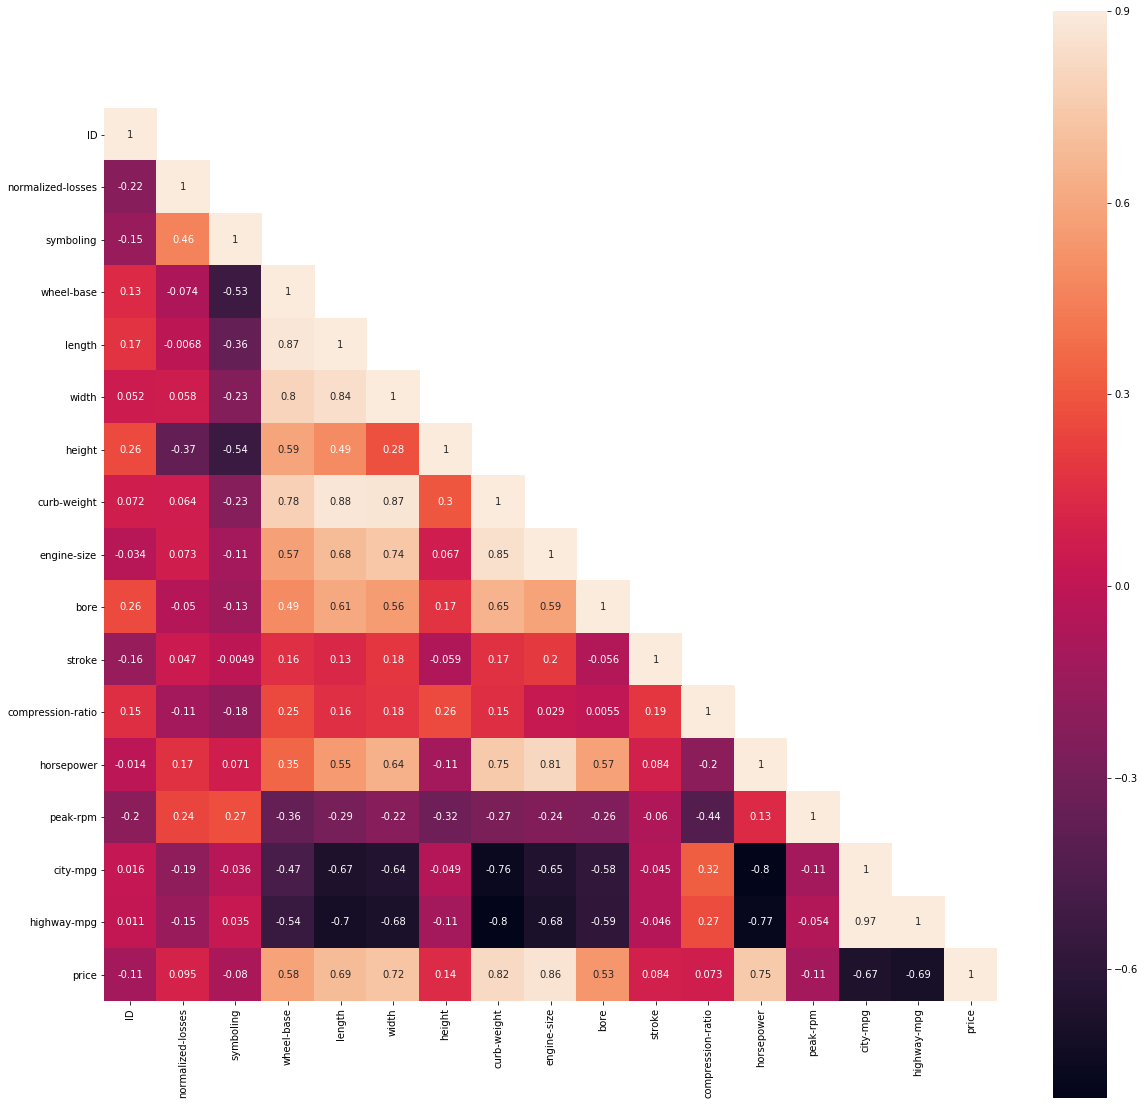

In [33]:
#We want to know the correlation between target variable and all other variables by using pearson
#create correlation with heatmap
corr = datamerge.corr(method = 'pearson')
#convert correlation to numpy array
mask = np.array(corr)
#to mask the repetitive value for each pair
mask[np.tril_indices_from(mask)] = False
fig, ax = plt.subplots(figsize = (13,12))
fig.set_size_inches(20,20)
sns.heatmap(corr, 
            mask = mask, 
            vmax = 0.9, 
            square = True, 
            annot = True)

## Business Understanding : Machine Specification
In this modeling, we want to cluster based on three variables, which is Bore and Stroke. <br>
Bore is the diameter of the cylinder or the contents of the engine block liner while the stroke is the distance of the piston that moves back and forth in the engine block. bore and stroke will affect engine performance. By knowing the bore and stroke specs, we can know the character of the vehicle. This model can be developed to find out the character of engine : overbore (ukuran bore lebih panjang dibandingkan dengan stroke), overstroke (ukuran stroke lebih panjang atau relatif sama panjang dengan bore), square engine.

## 1. K-Means
K-means clustering is an unsupervised learning algorithm that partitions n objects into K clusters, based on the nearest mean. We need to define which K is best before building a model.

In [37]:
#Define the data we gonna use in the model
datacluster= ['bore', 'stroke']
datacluster = datamerge[datacluster]
datacluster.head()

,bore,stroke
0,3.47,2.68
1,3.47,2.68
2,2.68,3.47
3,3.19,3.40
4,3.19,3.40


In [38]:
datacluster.shape

(205, 2)

In [39]:
#Convert Dataset to Data Array 
X = np.asarray(datacluster)

Text(0.5,1,'Grafik Spesifikasi Mesin Mobil')

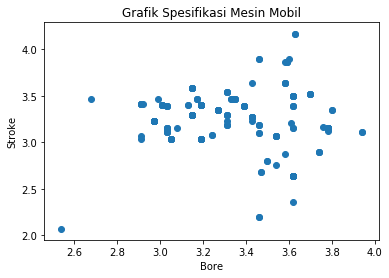

In [40]:
#vicualize the scatterplot
plt.scatter(X[:,0],X[:,1], label = 'True Position')
plt.xlabel("Bore")
plt.ylabel("Stroke")
plt.title("Grafik Spesifikasi Mesin Mobil")

## Modeling

Define the number of K clustering

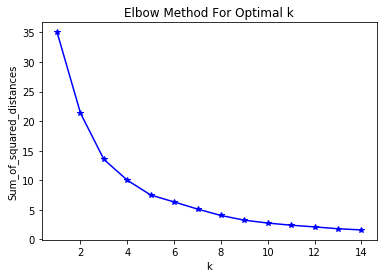

In [42]:
#By SCREE PLOT

Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(X)
    Sum_of_squared_distances.append(km.inertia_)

plt.plot(K, Sum_of_squared_distances, 'b*-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [43]:
#By SILHOUTTE

range_n_clusters = [2, 3, 4]
for n_cluster in range_n_clusters:
    kmeans = KMeans(n_clusters = n_cluster, max_iter =1000)
    kmeans.fit(X)
    labels = kmeans.predict(X)
    from sklearn.metrics import silhouette_score
    silhouette_avg = silhouette_score(X, labels)
    print(silhouette_avg)

0.459942192358769
0.43299519739642955
0.4331701686481536


Based on Scree Plot, the number of cluster we choose is K=3 because it more aligned with the purpose of our analysis.<br>
Besides, in Silhoutte, the value of possible cluster [2,3,4] between K=2 and K=3 is not give much difference and when K=4, the value is relatively constant.

In [44]:
#K-Means Activation Algorithm 
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [45]:
#Print the centroid value that is generated by K-Means Algorithm. 
print(kmeans.cluster_centers_)

[[3.55487179 3.40923077]
 [3.10737864 3.28582524]
 [3.54916667 2.63083333]]


## Clustering Results

In [46]:
#Print the Label of Cluster
print(kmeans.labels_)

[2 2 1 1 1 1 1 1 1 1 2 2 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 0 0 0 2 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 1 1 1 1 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0
 2 0 2 0 0 0 0 1 1 1 1 1 0 0 0 2 2 2 0 0 0 0 0 2 0 0 0 2 2 2 2 2 2 2 2 2 2
 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 1 0 0 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 2 1 0]


In [48]:
datacluster['klaster']=kmeans.labels_
datacluster.head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,bore,stroke,klaster
0,3.47,2.68,2
1,3.47,2.68,2
2,2.68,3.47,1
3,3.19,3.40,1
4,3.19,3.40,1


To determine what is the definition of each cluster, we can be seen from the center point of each column in each cluster from the highest to lowest.

In [49]:
datacluster["Spesifikasi Mesin"] = np.where(datacluster["klaster"]==0, "overbore",np.where(datacluster["klaster"]==1, "square engine", "overstroke"))
datacluster.head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,bore,stroke,klaster,Spesifikasi Mesin
0,3.47,2.68,2,overstroke
1,3.47,2.68,2,overstroke
2,2.68,3.47,1,square engine
3,3.19,3.40,1,square engine
4,3.19,3.40,1,square engine


## Visualization of Clustering Results

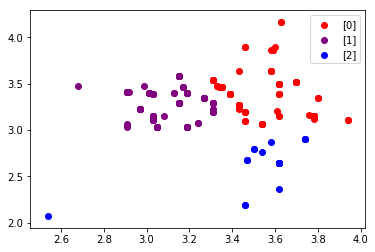

In [51]:
#To visualize the results

#data dibagi jadi x dan y
x=X[:,0]
y=X[:,1]
#data label dimasukkan ke array
group=kmeans.labels_
#define warna untuk setiap label, jumlah warna disesuaikan dengan banyak label
colors=['red', 'purple', 'blue']
fig, ax = plt.subplots()
#iterasi dilakukan untuk setial label/group
for g in set(kmeans.labels_):
    #data di filter untuk setiap grupnya dan kemudian dibuat scatternya
    xi=[x[j] for j in range(len(x)) if group[j]==g]
    yi=[y[j] for j in range(len(y)) if group[j]==g]
    ax.scatter(xi,yi, c=colors[g], label=[g])
#perintah untuk menampilkan legend
ax.legend()
plt.show()

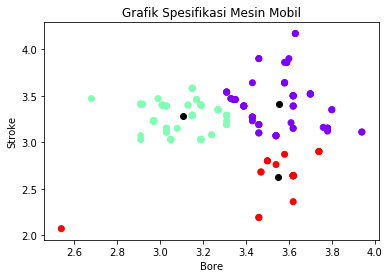

In [52]:
#To show the centroid of clustering results

plt.scatter(X[:,0],X[:,1], c=kmeans.labels_, cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],color='black')
plt.xlabel("Bore")
plt.ylabel("Stroke")
plt.title("Grafik Spesifikasi Mesin Mobil")
plt.show()

In [53]:
data_clustered = pd.DataFrame(X)
data_clustered['cluster'] = pd.DataFrame(kmeans.labels_)
data_clustered = data_clustered.sort_values('cluster')
data_clustered = np.asarray(data_clustered)

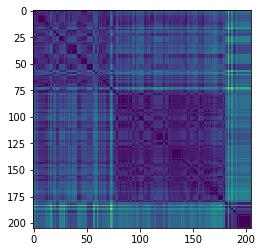

In [56]:
#Plotting similarity matrix
from scipy.spatial.distance import cdist
dist = cdist(data_clustered[:,0:2],data_clustered[:,0:2], metric='euclidean')
plt.imshow(dist)
plt.show()

## Conclusion
From the results, we can conclude that the best clustering on K-means is K=3 and the data distribution is more evenly.

## 2. HIERARCHIAL CLUSTERING

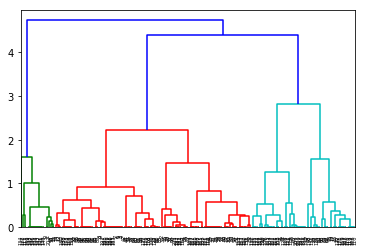

In [57]:
#Make different dendogram with ward method
dendrogram = sch.dendrogram(sch.linkage(X, method='ward'))

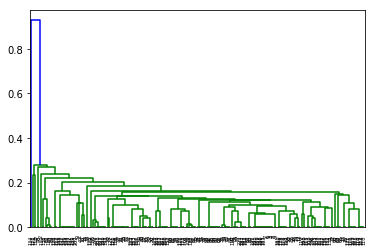

In [58]:
#Make different dendogram with single method
dendrogram = sch.dendrogram(sch.linkage(X, method='single'))

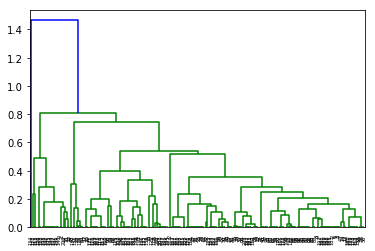

In [59]:
#Make different dendogram with average method
dendrogram = sch.dendrogram(sch.linkage(X, method='average'))

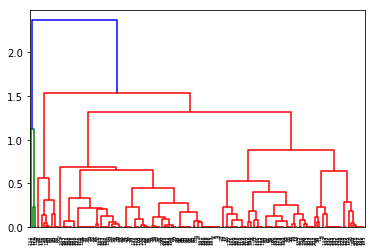

In [60]:
#Make different dendogram with complete method
dendrogram = sch.dendrogram(sch.linkage(X, method='complete'))

## Fitting Hierarchical Clustering Model

In [61]:
model = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward', compute_full_tree=False)
model.fit(X)
labels = model.labels_
print(labels)

[1 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 1 1 1 1 1 1 1 1
 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0]


## Visualizing Clustering Results

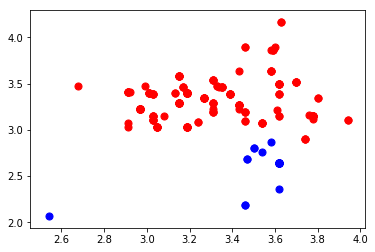

In [62]:
plt.scatter(X[labels==0, 0], X[labels==0, 1], s=50, marker='o', color='red')
plt.scatter(X[labels==1, 0], X[labels==1, 1], s=50, marker='o', color='blue')
plt.show()

## Conclusion
From the dendogram results, we can conclude that the best data distribution is with 'ward' method. Because the distribution of data with 'ward' method is more even compare to others. And from Hierarchial Clustering, the best number of cluster is 2.

## 3. DBSCAN

## Fitting DBSCAN Model

In [119]:
dbscan = DBSCAN(0.2, min_samples=4)
dbscan.fit(X)

DBSCAN(algorithm='auto', eps=0.2, leaf_size=30, metric='euclidean',
    metric_params=None, min_samples=4, n_jobs=1, p=None)

## Print Label of Clustering Results

In [120]:
print(dbscan.labels_)

[ 0  0 -1  1  1  1  1  1  1  1  0  0  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  2  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1
 -1  0  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  2  2  2  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1 -1  1  1  1  1  1  1
  1  1  1  1  2  1  0  0  0  1  2  2  1  1 -1  1  1  1 -1  0  0  0  0  0
  0  0  0  0  0  0  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  0  1  1]


## Visualizing Clustering Results

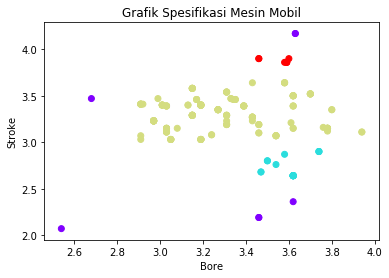

In [121]:
plt.scatter(X[:,0],X[:,1], c=dbscan.labels_, cmap='rainbow')
plt.xlabel("Bore")
plt.ylabel("Stroke")
plt.title("Grafik Spesifikasi Mesin Mobil")
plt.show()

## Conclusion 
In this DBSCAN model, we use epsilon and min_sample by trial and error. And from these results, the better epsilon and min_samples values are <br>
DBSCAN: (0.2, 4); epsilon=0.2 and min_samples=4. <br>
From the best model it can be produced that the number of clusters obtained is 3.

# DECISION MAKING

From the three clustering modeling method, we can make visualization based on one of the method results.

In [122]:
datacluster.head()

,bore,stroke,klaster,Spesifikasi Mesin
0,3.47,2.68,2,overstroke
1,3.47,2.68,2,overstroke
2,2.68,3.47,1,square engine
3,3.19,3.40,1,square engine
4,3.19,3.40,1,square engine


(-1.1020000563265904,
 1.1000952407774567,
 -1.1201520084268564,
 1.1019881642295855)

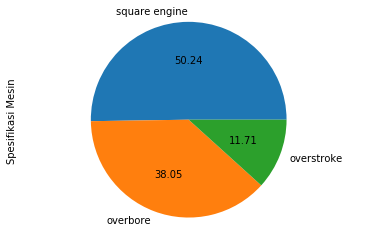

In [123]:
datacluster["Spesifikasi Mesin"].value_counts().plot.pie(autopct = "%.2f")
plt.axis("equal")

Based on the pie chart above, it can be seen in all data, the majority have square engine specifications of 50.24%, the second overbore is 38.05%, and overstroke is 11.71%.

If the engine is overbore (the bore size is longer than the stroke), the power of the vehicle appears especially during mid and high turns, making it suitable for racing. This is due to the length of movement up and down the piston faster because of the short stroke distance.

For overstroke engines (stroke size is longer or relatively the same length as the bore), the engine is designed to release its power (high torque and output) at low to medium engine speed.

For the type of engine square engine, torque and power evenly at all turns. Thus, this vehicle is suitable for all terrains, whether incline, urban, or traffic jam.

In [ ]:
klaster_0 = datacluster[datacluster.klaster == 0]
specs_0 = klaster_0.groupby("Spesifikasi Mesin")
hitung = specs_0["Spesifikasi Mesin"].count().sort_values(ascending = False)

sns.barplot(x = hitung.index, y = hitung)
plt.xticks(rotation = 45, fontsize = 10)
plt.title("Jumlah Penggunaan Metode Pembayaran")